## **Load dataset and import libraries**

In [163]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Load the dataset
forests = pd.read_csv('forests.csv')
display(forests.head())

,temp,humid,wind,rain,FFMC,DMC,DC,ISI,BUI,FWI,region,fire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia,False
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia,False
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia,False
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Bejaia,False
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia,False


---
</br>
</br>


## **Correlation matrix**

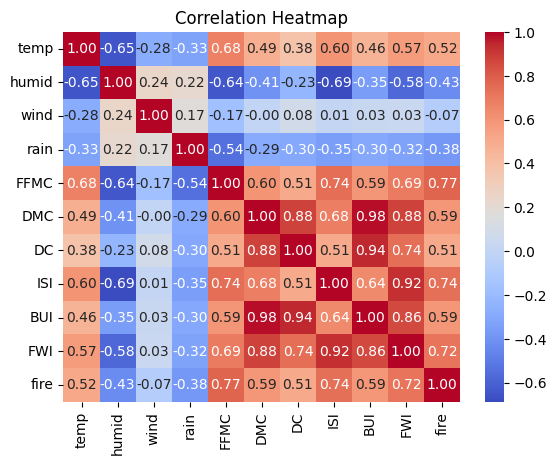

In [164]:
# Compute the correlation matrix for numerical columns
corr_grid = forests.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr_grid, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

---
</br>
</br>

## **Linear regression model predicting humidity based on temperature and region**

In [165]:
modelH = sm.OLS.from_formula('humid ~ temp + region', data=forests).fit()
print(modelH.params)

Intercept                   142.575801
region[T.Sidi Bel-abbes]     -7.247538
temp                         -2.392547
dtype: float64


#### **Regression equations:**
Full regression equation:
- `humid = 142.58 - 2.39* temp -7.25*region ; Where region = 1 if region is 'Sidi Bel-abbes', 0 otherwise`<br/>

For Bejaia (region = 0):
- `humid = 142.58 -2.39*temp` <br/>

For Sidi Bel-abbes (region = 1):
- `humid = 135.33 -2.39*temp` <br/>

#### **Interpretation of the coefficient on temp:**
- The coefficient on temp in the full regression equation represents the expected change in humidity for each one-unit increase in temperature, holding the region constant. <br/>
- Specifically, for each additional degree of temperature, the predicted humidity decreases by approximately `2.39` units, regardless of the region. <br/>

#### **Interpretation of the intercepts for each region:** 

- For Bejaia (`region = 0`), the intercept is `142.58`. <br/>
This means that when the `temperature` is `0°C`, the predicted humidity is `142.58` units. <br/>
In the context of the regression line, this is the point where the regression line for Bejaia crosses the y-axis (humidity axis). <br/>

- For Sidi Bel-abbes (`region = 1`), the intercept is `135.33`. <br/>
This means that when the temperature is 0°C, the predicted humidity is `135.33` units. <br/>
In the context of the regression line, this is the point where the regression line for Sidi Bel-abbes crosses the y-axis (humidity axis). <br/>

- In both cases, the intercept represents the predicted humidity when temperature is zero, which may not be a realistic scenario but provides a baseline for comparison between regions.

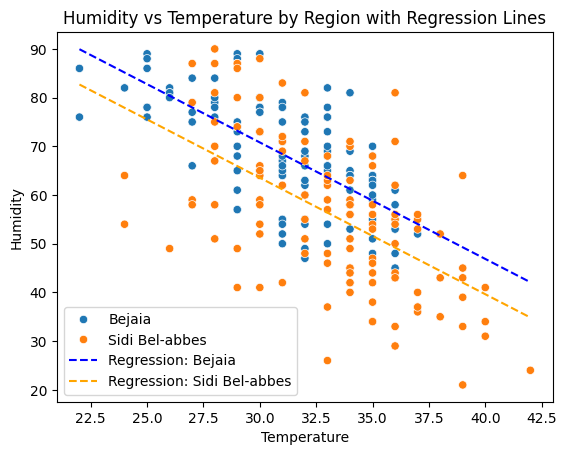

In [166]:
# Scatter plot of humidity vs temperature by region
sns.scatterplot(data=forests, x='temp', y='humid', hue='region')

# Regression lines for each region
temp_range = np.linspace(forests['temp'].min(), forests['temp'].max(), 100)

# Coefficients from modelH
intercept = modelH.params['Intercept']
temp_coef = modelH.params['temp']
region_coef = modelH.params['region[T.Sidi Bel-abbes]']

# For Bejaia (region = 0)
humid_bejaia = intercept + temp_coef * temp_range
plt.plot(temp_range, humid_bejaia, color='blue', label='Regression: Bejaia', linestyle='--')

# For Sidi Bel-abbes (region = 1)
humid_sidi = (intercept + region_coef) + temp_coef * temp_range
plt.plot(temp_range, humid_sidi, color='orange', label='Regression: Sidi Bel-abbes', linestyle='--')

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Humidity vs Temperature by Region with Regression Lines')
plt.legend()
plt.show()

---
</br>
</br>

## **Linear regression model predicting FFMC with temp, fire, and their interaction**

In [167]:
resultsF = sm.OLS.from_formula('FFMC ~ temp * fire', data=forests).fit()
print(resultsF.params)

Intercept            -8.108891
fire[T.True]         76.788000
temp                  2.445159
temp:fire[T.True]    -1.887219
dtype: float64


#### **Regression equation:**
- `outcome = -8.108891 + 76.788000 * fire + 2.445159 * temp - 1.887219 * temp * fire`
- When `fire == False`: </br> `outcome = -8.108891 + 2.445159 * temp`
- When `fire == True`: </br> `outcome = 68.679109 + 0.557940 * temp`

#### **Interpretation of the coefficient on temp for each group of fire:**

- **When `fire == False`:**  
    The coefficient on temp is `2.45`. This means that for observations where there is no fire, each one-unit increase in temperature is associated with an increase of approximately 2.45 units in FFMC, holding all else constant.

- **When `fire == True`:**  
    The coefficient on temp is `0.56`. This means that for observations where there is a fire, each one-unit increase in temperature is associated with an increase of only about 0.56 units in FFMC, holding all else constant.

- **Comparison:**  
    The effect of temperature on FFMC is much stronger when there is no fire compared to when there is a fire. The interaction term indicates that the presence of fire reduces the impact of temperature on FFMC.

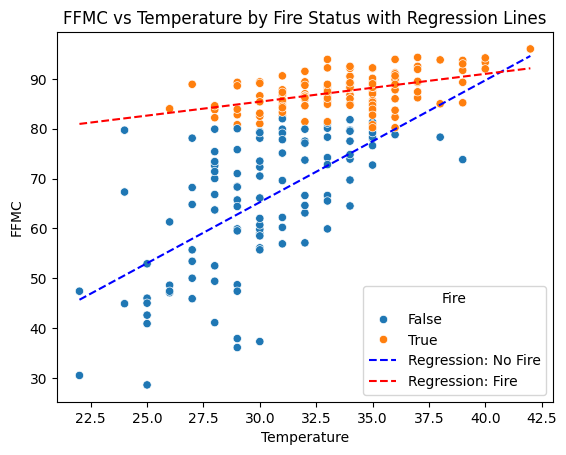

In [168]:
# Scatter plot of FFMC vs temperature colored by fire status
sns.scatterplot(data=forests, x='temp', y='FFMC', hue='fire')

# Regression lines for each group of fire
# Coefficients from resultsF
intercept_F = resultsF.params['Intercept']
temp_coef_F = resultsF.params['temp']
fire_coef_F = resultsF.params['fire[T.True]']
interaction_coef_F = resultsF.params['temp:fire[T.True]']

# For fire == False
ffmc_no_fire = intercept_F + temp_coef_F * temp_range
plt.plot(temp_range, ffmc_no_fire, color='blue', label='Regression: No Fire', linestyle='--')

# For fire == True
ffmc_fire = (intercept_F + fire_coef_F) + (temp_coef_F + interaction_coef_F) * temp_range
plt.plot(temp_range, ffmc_fire, color='red', label='Regression: Fire', linestyle='--')

plt.xlabel('Temperature')
plt.ylabel('FFMC')
plt.title('FFMC vs Temperature by Fire Status with Regression Lines')
plt.legend(title='Fire')
plt.show()

---
</br></br>

## **Linear regression model predicting FFMC with humidity**

In [169]:
# Add squared humidity term
forests['humid_sq'] = forests['humid'] ** 2

# Fit the regression model
resultsP = sm.OLS.from_formula('FFMC ~ humid + humid_sq', data=forests).fit()
print(resultsP.params)

Intercept    77.634041
humid         0.752165
humid_sq     -0.011420
dtype: float64


#### **Regression equation:**
The regression equation from the previous step is:
- `FFMC = -8.1089 + 2.4452 * humid - 0.0082 * humid_sq`

#### **FFMC predictions for given humidity levels:**

Let’s calculate FFMC for each humidity value:

- For `humid = 25`:
    - `FFMC = -8.1089 + 2.4452 * 25 - 0.0082 * (25^2)`
    - `FFMC = -8.1089 + 61.13 - 5.125`
    - `FFMC ≈ 47.90`

- For `humid = 35`:
    - `FFMC = -8.1089 + 2.4452 * 35 - 0.0082 * (35^2)`
    - `FFMC = -8.1089 + 85.582 - 10.045`
    - `FFMC ≈ 67.43`

- For `humid = 60`:
    - `FFMC = -8.1089 + 2.4452 * 60 - 0.0082 * (60^2)`
    - `FFMC = -8.1089 + 146.712 - 29.52`
    - `FFMC ≈ 109.08`

- For `humid = 70`:
    - `FFMC = -8.1089 + 2.4452 * 70 - 0.0082 * (70^2)`
    - `FFMC = -8.1089 + 171.164 - 40.18`
    - `FFMC ≈ 122.88`

#### **Difference in FFMC:**

- Increase from 25% to 35%: `67.43 - 47.90 = 19.53`
- Increase from 60% to 70%: `122.88 - 109.08 = 13.80`

**Observation:**  
The increase in FFMC when humidity rises from 25% to 35% (`+19.53`) is larger than the increase from 60% to 70% (`+13.80`). This suggests that the effect of humidity on FFMC diminishes at higher humidity levels, consistent with the negative coefficient on the squared humidity term in the regression equation.

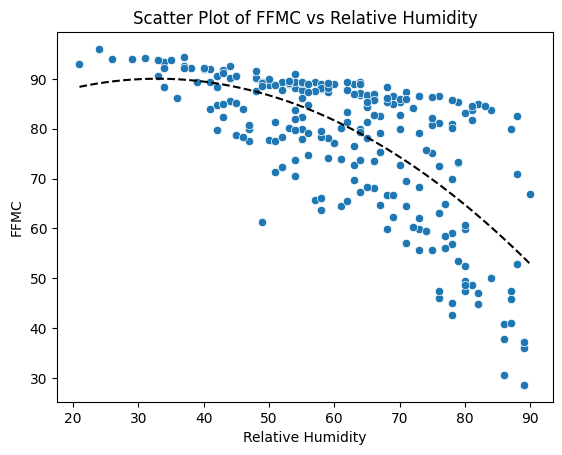

In [170]:
# Scatter plot of FFMC vs relative humidity
sns.scatterplot(data=forests, x='humid', y='FFMC')
plt.xlabel('Relative Humidity')
plt.ylabel('FFMC')
plt.title('Scatter Plot of FFMC vs Relative Humidity')

# Regression line for FFMC vs relative humidity
humid_range = np.linspace(forests['humid'].min(), forests['humid'].max(), 100)  
ffmc_humid = resultsP.params['Intercept'] + resultsP.params['humid'] * humid_range + resultsP.params['humid_sq'] * humid_range ** 2
plt.plot(humid_range, ffmc_humid, color='black', label='Regression Line', linestyle='--')
plt.show()

---
</br>
</br>

## **Multiple regression predicting FFMC from humidity, temperature, wind, and rain**

In [171]:
# Multiple regression predicting FFMC from humidity, temperature, wind, and rain
results_all = sm.OLS.from_formula('FFMC ~ humid + temp + wind + rain', data=forests).fit()
print(results_all.params)

Intercept    50.461574
humid        -0.345373
temp          1.377774
wind          0.419784
rain         -2.614067
dtype: float64


---
</br>
</br>

## **Multiple regression predicting FWI from ISI and BUI**

Intercept   -2.270676
ISI          1.133400
BUI          0.235526
dtype: float64


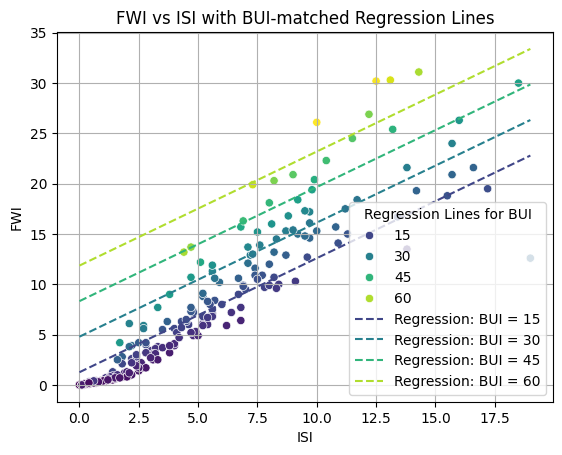

In [172]:
# Multiple regression predicting FWI from ISI and BUI
results_fwi = sm.OLS.from_formula('FWI ~ ISI + BUI', data=forests).fit()
print(results_fwi.params)

# Scatter plot (continuous BUI coloring)
scatter = sns.scatterplot(data=forests, x='ISI', y='FWI', hue='BUI', palette='viridis')

# Get the colormap used by seaborn
norm = plt.Normalize(forests['BUI'].min(), forests['BUI'].max())
cmap = plt.cm.viridis

# ISI range
isi_range_fwi = np.linspace(forests['ISI'].min(), forests['ISI'].max(), 100)

# Regression coefficients
intercept_fwi = results_fwi.params['Intercept']
isi_coef_fwi = results_fwi.params['ISI']
bui_coef_fwi = results_fwi.params['BUI']

# BUI values to plot lines for
bui_values = [15, 30, 45, 60]

# Plot regression lines in matching colors
for bui_val in bui_values:
    color = cmap(norm(bui_val))
    fwi_pred = intercept_fwi + isi_coef_fwi * isi_range_fwi + bui_coef_fwi * bui_val
    plt.plot(isi_range_fwi, fwi_pred, color=color, label=f'Regression: BUI = {bui_val}', linestyle='--')

# Final touches
plt.xlabel('ISI')
plt.ylabel('FWI')
plt.title('FWI vs ISI with BUI-matched Regression Lines')
plt.legend(title='Regression Lines for BUI')
plt.grid(True)
plt.show()

---
</br>
</br>